# CK0223 - Mineração de Dados

## Lista 03 - Análise de Dados

### Dados do discente:
**Nome**: Luiza Esther Martins Pessoa
**Matrícula**: 555516

### Vídeo Youtube:
[Mineração de Dados: Lista 03 - Análise de Dados (Explicando o código)]()

### GitHub:
[EstherMart - Análise de Dados](https://github.com/EstherMart/Data-Mining/blob/main/Lista03_AnaliseDeDados/analise_de_dados.ipynb)

---

### **(a)** Ler o dataset *fakeTelegram.BR_2022.csv*

Como realizado na [Lista 01 - Tratamento de Dados](https://github.com/EstherMart/Data-Mining/blob/main/Lista01_TratamentoDeDados/tratamento.ipynb) e na [Lista 02 - Extração de Dados](https://github.com/EstherMart/Data-Mining/tree/main/Lista02_ExtracaoDeDados), ler o dataset é o primeiro passo para iniciarmos a extraçãa, manipulação e tratamento dos dados. 

Para fazer isso, começamos importando as bibliotecas necessárias para leitura (`pandas`) e para download local da base de dados (`gdown`). Além disso, vale ressaltar que existem outras formas de realizar o upload para o repositório local, mas decidi seguir a lógica de puxar e realizar o download de base utilizando apenas o link disponibilizado pelo professor.

**Importante**: Alguns trechos de código serão reutilizados, visto que são as mesmas exigências em ambas as listas e tal solicitação já foi realizada nas listas anteriores.

In [32]:
# IMPORTAÇÃO DE BIBLIOTECAS
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import kstest, zscore
from scipy.stats import shapiro
from scipy.stats import spearmanr

Fazendo o download do dataset para o repositório local

In [2]:
origem_url = 'https://drive.google.com/file/d/1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm/view'

# O ID do arquivo (necessário para fazer o download direto) está entre os últimos elementos da URL.
# Fazemos um split na URL usando '/' como separador e pegamos o penúltimo elemento da lista.
# Isso funciona porque a estrutura da URL é:
# https://drive.google.com/file/d/ID_DO_ARQUIVO/view
# E ao aplicar url.split('/'), o resultado será:
# ['https:', '', 'drive.google.com', 'file', 'd', 'ID_DO_ARQUIVO', 'view?...']
# Portanto, o ID está na posição -2 (penúltima).

file_id = origem_url.split('/')[-2]

# URL do arquivo no formato aceito pelo gdown
url = f'https://drive.google.com/uc?id={file_id}'

# Nome local do arquivo que será baixado
output = 'fakeTelegram.BR_2022.csv'

# Baixando o arquivo com gdown
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm
From (redirected): https://drive.google.com/uc?id=1c_hLzk85pYw-huHSnFYZM_gn-dUsYRDm&confirm=t&uuid=7447e205-7eec-4349-8b15-0863e2988e4a
To: c:\Users\esthe\Downloads\Data-Mining\Lista03_AnaliseDeDados\fakeTelegram.BR_2022.csv
100%|██████████| 224M/224M [00:49<00:00, 4.50MB/s] 


'fakeTelegram.BR_2022.csv'

Leitura do dataset utilizando o método `.read_csv()`, pois permite carregar dados estruturados a partir de arquivos *CSV* para um DataFrame do pandas, sendo uma estrutura tabular extremamente versátil para análise de dados e visualmente intuitiva.

In [23]:
df_inicial = pd.read_csv("fakeTelegram.BR_2022.csv")

Os códigos abaixo foram implementados apenas para fins de **visualização e verificação inicial dos dados carregados**, com o objetivo de:
- Obter uma compreensão rápida da dimensão do dataset
- Identificar os nomes das colunas disponíveis
- Realizar uma primeira checagem da integridade básica da estrutura de dados

In [3]:
# PARA MELHOR VISUALIZAÇÃO
print("Número de linhas:", df_inicial.shape[0])
print("Número de colunas:", df_inicial.shape[1])
print("\nColunas disponíveis:")
for i, col in enumerate(df_inicial.columns, 1):
    print(f"{i}. {col}")

Número de linhas: 557586
Número de colunas: 19

Colunas disponíveis:
1. date_message
2. id_member_anonymous
3. id_group_anonymous
4. media
5. media_type
6. media_url
7. has_media
8. has_media_url
9. trava_zap
10. text_content_anonymous
11. dataset_info_id
12. date_system
13. score_sentiment
14. score_misinformation
15. id_message
16. message_type
17. messenger
18. media_name
19. media_md5


In [4]:
# VISUALIZANDO AMOSTRAS INICIAIS E FINAIS DO DATASET
display(df_inicial.head().style.set_caption("Primeiros Registros").set_properties(**{
    'background-color': '#f8f9fa',
    'border': '1px solid #dee2e6',
    'color': '#212529',
    'max-width': '300px',
    'overflow': 'hidden',
    'text-overflow': 'ellipsis',
    'white-space': 'nowrap'
}))

display(df_inicial.tail().style.set_caption("Últimos Registros").set_properties(**{
    'background-color': '#f8f9fa',
    'border': '1px solid #dee2e6',
    'color': '#212529',
    'max-width': '300px',
    'overflow': 'hidden',
    'text-overflow': 'ellipsis',
    'white-space': 'nowrap'
}))

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,nan,nan,nan,False,False,False,Então é Fato Renato o áudio que eu ouvi no whatsapp isso ocorreu em Niterói principalmente no bairro Fonseca ?,5,2022-10-05 06:25:28.863641,0.000000,nan,16385,Texto,telegram,nan,nan
1,2022-10-05 06:25:08,nan,12283e08a2eb5789201e105b34489ee7,nan,nan,nan,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás, infelizmente não consigo enviar para cá, mas é facilmente verificável no YouTube do presidente",5,2022-10-05 06:25:28.926311,0.064400,nan,16386,Texto,telegram,nan,nan
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,nan,nan,nan,False,False,False,"É isso, nossa parte já foi quase toda feita. No segundo turno completamos nossa parte desse teatro. Essa é uma guerra de 4* geração na dimensão humana e uma guerra espiritual do bem contra o mal na dimensão do Universo. Pensamento positivo é fundamental, pensem sempre em algo bom. Deus continua nos abençoando, nosso livre arbítrio completa o curso.",5,2022-10-05 06:26:29.361949,-0.355100,0.157242,16366,Texto,telegram,nan,nan
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,nan,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.000000,nan,19281,Imagem,telegram,nan,94dca4cda503100ebfda7ce2bcc060eb
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,nan,True,False,False,nan,5,2022-10-05 06:28:29.316325,nan,nan,507185,Imagem,telegram,nan,5ad5c8bbe9da93a37fecf3e5aa5b0637


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
557581,2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-tem-lucro-de-r-96-bilhoes-no-terceiro-trimestre/,True,True,False,"BNDES tem lucro de R$ 9,6 bilhões no terceiro trimestre ☛ https://terrabrasilnoticias.com/2022/11/bndes-tem-lucro-de-r-96-bilhoes-no-terceiro-trimestre/",5,2022-11-16 14:49:39.146502,0.102700,nan,575796,Url,telegram,nan,25e43b6a58b848c43ad5b5f9e979822a
557582,2022-11-11 12:09:08,nan,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,https://youtu.be/8g1Vz9_0xVk,5,2022-11-16 14:49:39.847434,0.000000,nan,1286443,Url,telegram,nan,657949d03e4088f6b332e2686ccd3221
557583,2022-11-11 12:09:47,nan,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:39.922279,0.000000,nan,13294,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e
557584,2022-11-11 12:09:46,nan,5b10d7739171149be6d9961e3350c071,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:39.992932,0.000000,nan,1286444,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e
557585,2022-11-11 12:09:48,nan,b11f2df64ac19aad47a50accf32052d6,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,"Empresários, demitam os petistas primeiro. https://t.me/vemprasruas",5,2022-11-16 14:49:40.064006,0.000000,nan,192127,Imagem,telegram,nan,a21848a61045380a6483866daed0ca0e


---

### **(b)** Remova os trava-zaps.

Este item será resolvido através da manipulação da coluna `trava_zap`, previamente identificada na análise inicial. A estratégia adotada considera o tamanho do dataset (557.586 registros) e segue um fluxo estruturado:

1. **Análise Preliminar**
    - Verificação do tipo de dado (dtype) e valores únicos na coluna `trava_zap`
    - Confirmação da proporção True/False/NaN (se aplicável)

In [5]:
# ANÁLISE PRELIMINAR
# Verificação do tipo e valores únicos
print(f"Tipo de dado: {df_inicial['trava_zap'].dtype}")
trava_dist = df_inicial['trava_zap'].value_counts(dropna=False)
display(trava_dist.to_frame().style.set_caption("Contagem de valores distintos em trava_zap"))

# Verificação de linhas que devem ser removidas
print(f"Registros com trava_zap que precisam ser removidos: {trava_dist.get(True, 0):,}")

Tipo de dado: bool


,count
trava_zap,
False,557570
True,16


Registros com trava_zap que precisam ser removidos: 16


2. **Processamento por Chunks**
    - Divisão do dataset em blocos de 1.000 linhas para:
        - Otimização de memória
        - Facilidade de debug
        - Monitoramento do progresso

In [24]:
# Parâmetros do chunk -- 1000 linhas 
CHUNK_SIZE = 1000
total_chunks = (len(df_inicial) // CHUNK_SIZE) + 1
df_sem_trava_zap = pd.DataFrame() # Criação de DataFrame Seguro para controle de variáveis.

print(f"\033[1mProcessando {total_chunks} chunks de {CHUNK_SIZE} registros cada:\033[0m")

for i, chunk in enumerate(np.array_split(df_inicial, total_chunks)):
    # Filtro principal -- linhas que possuem trava zap, isto é, trava_zap = True
    chunk_filtrado = chunk[chunk['trava_zap'] != True]
    
    # Concatenção segura -- recebendo apenas os blocos onde trava_zap = False
    df_sem_trava_zap = pd.concat([df_sem_trava_zap, chunk_filtrado], ignore_index=True)
    
    # Log de progresso para controle da análise
    if (i+1) % 10 == 0:
        print(f"Processado chunk {i+1}/{total_chunks} | Registros retidos: {len(df_sem_trava_zap):,}")

Processando 558 chunks de 1000 registros cada:


c:\Users\esthe\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Processado chunk 10/558 | Registros retidos: 10,000
Processado chunk 20/558 | Registros retidos: 20,000
Processado chunk 30/558 | Registros retidos: 29,999
Processado chunk 40/558 | Registros retidos: 39,999
Processado chunk 50/558 | Registros retidos: 49,999
Processado chunk 60/558 | Registros retidos: 59,999
Processado chunk 70/558 | Registros retidos: 69,999
Processado chunk 80/558 | Registros retidos: 79,999
Processado chunk 90/558 | Registros retidos: 89,998
Processado chunk 100/558 | Registros retidos: 99,998
Processado chunk 110/558 | Registros retidos: 109,998
Processado chunk 120/558 | Registros retidos: 119,998
Processado chunk 130/558 | Registros retidos: 129,998
Processado chunk 140/558 | Registros retidos: 139,998
Processado chunk 150/558 | Registros retidos: 149,992
Processado chunk 160/558 | Registros retidos: 159,982
Processado chunk 170/558 | Registros retidos: 169,972
Processado chunk 180/558 | Registros retidos: 179,962
Processado chunk 190/558 | Registros retidos: 1

In [25]:
# Relatório final
print("\033[1mRelatório de Remoção:\033[0m")
print(f"• Registros originais: {len(df_inicial):,}")
print(f"• Registros removidos: {trava_dist.get(True, 0):,}")
print(f"• Registros restantes: {len(df_sem_trava_zap):,}") 

# Visualização dos dados que foram removidos
if trava_dist.get(True, 0) > 0:
    display(
        df_inicial[df_inicial['trava_zap'] == True].head(16)  
    )

Relatório de Remoção:
• Registros originais: 557,586
• Registros removidos: 16
• Registros restantes: 557,570


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5
21944,2022-10-07 07:46:52,NaN,c712c1b704c22bd0cef50bc06125cdbd,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-07 07:47:00.355052,0.0000,0.067344,53260,Texto,telegram,NaN,NaN
89109,2022-10-16 00:45:02,8a30ac374bc4b5930eaf0667a178546a,e56ec342fc599ebb4ed89655eb6f03aa,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-16 00:45:04.064662,0.0000,0.056698,521324,Texto,telegram,NaN,NaN
294541,2022-10-04 14:22:47,39ee10516124280a22f1798f2a41f9a7,959f13e0079883060632c74ffc81c547,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-04 14:22:48.808572,0.9734,0.010433,27241,Texto,telegram,NaN,NaN
324567,2022-10-25 14:55:55,e003fbb6ffedb1838e42360d41cab314,5b10d7739171149be6d9961e3350c071,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-25 14:56:11.604972,0.9460,0.403945,1182938,Texto,telegram,NaN,NaN
389164,2022-10-30 20:19:52,NaN,c8f2de56550ed0bf85249608b7ead93d,NaN,NaN,NaN,False,False,True,NaN,5,2022-10-30 20:19:54.183578,0.0000,NaN,28330,Texto,telegram,NaN,NaN
423083,2022-11-03 00:40:23,NaN,4d3712f5a117e36180d4b4cbd07c540e,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-03 00:40:48.993091,0.0000,0.067026,171104,Texto,telegram,NaN,NaN
466735,2022-11-07 20:47:35,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-07 20:48:16.653321,0.0000,0.036173,88890,Texto,telegram,NaN,NaN
467297,2022-11-08 10:07:14,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-08 10:07:25.260375,0.0000,0.072637,88977,Texto,telegram,NaN,NaN
471273,2022-11-08 20:37:52,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-08 20:38:02.773746,0.0000,0.031973,89039,Texto,telegram,NaN,NaN
478270,2022-11-09 19:50:12,4a498818da925377eff2606a260cfa45,f61777908059b318385882ff47b15c33,NaN,NaN,NaN,False,False,True,NaN,5,2022-11-09 19:50:36.039894,0.0000,0.029651,89212,Texto,telegram,NaN,NaN


---

### **(c)** Remover as linhas repetidas (duplicadas).

Após realizar a filtragem das mensagens identificadas como "trava-zaps", é fundamental para garantir que análises estatísticas e inferências posteriores não sejam distorcidas por registros repetidos, que poderiam inflar contagens ou enviesar métricas como proporções, médias e distribuições.

A remoção de linhas repetidas foi realizada utilizando o método `drop_duplicates()` do Pandas, aplicado diretamente sobre o `df_sem_trava_zap`. Esse método verifica todas as colunas do DataFrame e elimina quaisquer registros que sejam completamente idênticos em todas elas. Abaixo está o código utilizado:

In [26]:
# Identificação das linhas duplicadas
duplicatas = df_sem_trava_zap[df_sem_trava_zap.duplicated(keep=False)]

# Relatório de remoção de duplicatas
print("\033[1mRelatório de Remoção de Duplicatas:\033[0m")
print(f"• Registros antes da remoção: {len(df_sem_trava_zap):,}")
print(f"• Duplicatas encontradas: {len(duplicatas):,}")
print(f"• Registros únicos após remoção: {len(df_sem_trava_zap.drop_duplicates()):,}")

# Visualização das linhas duplicadas que serão removidas
if not duplicatas.empty:
    display(duplicatas.sort_values(by='id_message').head(10))  # Mostra 10 duplicadas ordenadas por id_message

Relatório de Remoção de Duplicatas:
• Registros antes da remoção: 557,570
• Duplicatas encontradas: 0
• Registros únicos após remoção: 557,570


---

### **(d)** Remover textos com menos de 5 palavras. 

Nesta etapa, o objetivo foi eliminar mensagens com pouco conteúdo textual, mais especificamente aquelas com menos de 5 palavras. Isso se justifica pela baixa relevância semântica de mensagens muito curtas, que tendem a conter ruídos, emojis soltos, confirmações ("sim", "ok", "não") ou abreviações que pouco contribuem para análises mais profundas.

Para isso, foi criada uma nova feature chamada `qtd_palavras`, responsável por contabilizar o número de palavras em cada mensagem da coluna `text_content_anonymous`. Com essa informação, filtramos o DataFrame mantendo apenas registros com 5 ou mais palavras.

O relatório abaixo resume o resultado dessa filtragem.

Além disso, uma amostra das mensagens descartadas foi exibida para inspeção manual e validação da decisão tomada.

In [27]:
# Criação da feature 'qtd_palavras' com a contagem de palavras na mensagem
df_sem_trava_zap['qtd_palavras'] = df_sem_trava_zap['text_content_anonymous'].astype(str).apply(lambda x: len(x.split()))

# Identificação das mensagens com menos de 5 palavras
mensagens_curta = df_sem_trava_zap[df_sem_trava_zap['qtd_palavras'] < 5]

# Filtragem: apenas mensagens com 5 ou mais palavras
df_sem_mensagens_curtas = df_sem_trava_zap[df_sem_trava_zap['qtd_palavras'] >= 5].reset_index(drop=True)

# Relatório de remoção
print("\033[1mRelatório de Remoção de Mensagens Curtas:\033[0m")
print(f"• Registros antes da remoção: {len(df_sem_trava_zap):,}")
print(f"• Mensagens com menos de 5 palavras removidas: {len(mensagens_curta):,}")
print(f"• Registros restantes: {len(df_sem_mensagens_curtas):,}")

# Visualização das mensagens que foram removidas
if not mensagens_curta.empty:
    display(mensagens_curta[['text_content_anonymous', 'qtd_palavras']].sort_values(by='qtd_palavras').head(10)) # Apenas os 10 primeiros casos

Relatório de Remoção de Mensagens Curtas:
• Registros antes da remoção: 557,570
• Mensagens com menos de 5 palavras removidas: 218,284
• Registros restantes: 339,286


,text_content_anonymous,qtd_palavras
4,NaN,1
337292,NaN,1
337293,NaN,1
337294,NaN,1
337295,NaN,1
337296,NaN,1
337298,https://youtu.be/sOc-TRTh-7o,1
337299,https://www.youtube.com/watch?v=s4vdVj4VCvk,1
337300,NaN,1
337301,NaN,1


---

### **(e)** Para cada atributo numérico apresente

Antes de calcular as medidas e tabelas, foi realizada uma análise exploratória inicial para mapear os atributos numéricos disponíveis e avaliar possíveis valores ausentes, formatos incorretos e dispersões.

O comando `.info()` permitiu inspecionar os tipos de dados presentes no DataFrame, enquanto o `.describe()` forneceu um resumo estatístico geral (contagem, média, desvio padrão, mínimo, percentis e máximo) das colunas numéricas.

Essa etapa é fundamental para compreender a estrutura dos dados e orientar as análises estatísticas subsequentes de forma segura e eficiente.

In [11]:
# Visualização geral das colunas e tipos
print("\033[1mInformações do DataFrame:\033[0m")
df_sem_mensagens_curtas.info()

# Estatísticas descritivas básicas para colunas numéricas
print("\n\033[1mResumo Estatístico das Colunas Numéricas:\033[0m")
display(df_sem_mensagens_curtas.describe())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339286 entries, 0 to 339285
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_message            339286 non-null  object 
 1   id_member_anonymous     142880 non-null  object 
 2   id_group_anonymous      339286 non-null  object 
 3   media                   126431 non-null  object 
 4   media_type              126431 non-null  object 
 5   media_url               82936 non-null   object 
 6   has_media               339286 non-null  bool   
 7   has_media_url           339286 non-null  bool   
 8   trava_zap               339286 non-null  bool   
 9   text_content_anonymous  339286 non-null  object 
 10  dataset_info_id         339286 non-null  int64  
 11  date_system             339286 non-null  object 
 12  score_sentiment         339239 non-null  float64
 13  score_misinformation    167224 non-null  float64

,dataset_info_id,score_sentiment,score_misinformation,id_message,qtd_palavras
count,339286.0,339239.000000,167224.000000,3.392860e+05,339286.000000
mean,5.0,0.022025,0.312263,4.219091e+05,42.027817
std,0.0,0.529724,0.293703,4.843659e+05,74.050521
min,5.0,-1.000000,0.000003,2.000000e+00,5.000000
25%,5.0,-0.381800,0.078466,1.991900e+04,14.000000
50%,5.0,0.000000,0.197592,8.490950e+04,20.000000
75%,5.0,0.505300,0.490396,9.730932e+05,40.000000
max,5.0,0.999200,1.000000,1.516436e+06,1261.000000


#### 1. **Medidas de Tendência Central**

Para cada atributo numérico identificado no dataset, foram calculadas as principais medidas de tendência central e de dispersão, sendo:

- **Média**: valor médio da distribuição.
- **Mediana**: valor central quando os dados estão ordenados.
- **Moda**: valor que mais se repete.
- **Desvio Padrão**: indica a dispersão dos dados em relação à média.
- **Mínimo e Máximo**: ajudam a entender a amplitude da distribuição.
- **Valores Nulos**: quantidade de registros ausentes (importante para avaliar a qualidade do dado).

Essas medidas fornecem uma visão geral do comportamento central dos dados e ajudam a identificar possíveis distorções, outliers e padrões relevantes.

In [11]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
medidas_central = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()  # Ignora valores nulos
    media = serie.mean()
    mediana = serie.median()
    moda = serie.mode().iloc[0] if not serie.mode().empty else 'N/A'
    desvio = serie.std()
    minimo = serie.min()
    maximo = serie.max()
    total_nulos = df_sem_mensagens_curtas[coluna].isna().sum()
    
    medidas_central.append({
        'Atributo': coluna,
        'Média': round(media, 3),
        'Mediana': round(mediana, 3),
        'Moda': moda,
        'Desvio Padrão': round(desvio, 3),
        'Mínimo': minimo,
        'Máximo': maximo,
        'Valores Nulos': total_nulos
    })

# Criação do DataFrame com os resultados
df_medidas_central = pd.DataFrame(medidas_central)

# Exibição formatada
display(df_medidas_central.sort_values(by='Atributo'))


,Atributo,Média,Mediana,Moda,Desvio Padrão,Mínimo,Máximo,Valores Nulos
0,dataset_info_id,5.000,5.000,5.000000,0.000,5.000000,5.000000e+00,0
3,id_message,421909.079,84909.500,1014.000000,484365.886,2.000000,1.516436e+06,0
4,qtd_palavras,42.028,20.000,15.000000,74.051,5.000000,1.261000e+03,0
2,score_misinformation,0.312,0.198,0.110628,0.294,0.000003,1.000000e+00,172062
1,score_sentiment,0.022,0.000,0.000000,0.530,-1.000000,9.992000e-01,47


#### 2. **Medidas de Variabilidade**


Calcular as medidas de variabilidade permitem compreender o grau de dispersão das variáveis numéricas presentes no dataset. Esse tipo de análise é fundamental para avaliar a homogeneidade ou heterogeneidade dos dados, além de fornecer suporte para interpretações mais robustas nas etapas seguintes.

As principais medidas utilizadas foram:

- **Desvio padrão:** avalia o quanto, em média, os valores se distanciam da média. (também calculada no item anterior)
- **Variância:** representa o quadrado do desvio padrão, destacando a variabilidade dos dados.
- **Amplitude:** diferença entre o valor máximo e o mínimo, mostrando a extensão total dos dados.
- **Intervalo interquartílico (IQR):** mede a dispersão dos dados ao redor da mediana, sendo robusto contra outliers.


Pontos levados em consideração
- as variáveis **`score_sentiment`** e **`score_misinformation`** apresentam níveis distintos de variabilidade. 
- A análise do desvio padrão e da variância indica o quanto os escores se dispersam ao redor de suas médias, sendo que valores mais altos apontam para maior heterogeneidade.
- A amplitude fornece uma visão geral do intervalo total observado nos dados, enquanto o intervalo interquartílico (IQR) permite avaliar a dispersão ao redor da mediana, sendo uma métrica menos sensível a valores extremos.

In [14]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
medidas_variabilidade = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()  # Ignora valores nulos
    desvio = serie.std()
    variancia = serie.var()
    amplitude = serie.max() - serie.min()
    iqr = serie.quantile(0.75) - serie.quantile(0.25)
    total_nulos = df_sem_mensagens_curtas[coluna].isna().sum()
    
    medidas_variabilidade.append({
        'Atributo': coluna,
        'Desvio Padrão': round(desvio, 3),
        'Variância': round(variancia, 3),
        'Amplitude': round(amplitude, 3),
        'Intervalo Interquartílico (IQR)': round(iqr, 3),
        'Valores Nulos': total_nulos
    })

# Criação do DataFrame com os resultados
df_medidas_variabilidade = pd.DataFrame(medidas_variabilidade)

# Exibição formatada
display(df_medidas_variabilidade.sort_values(by='Atributo'))


,Atributo,Desvio Padrão,Variância,Amplitude,Intervalo Interquartílico (IQR),Valores Nulos
0,dataset_info_id,0.000,0.000000e+00,0.000,0.000,0
3,id_message,484365.886,2.346103e+11,1516434.000,953174.250,0
4,qtd_palavras,74.051,5.483480e+03,1256.000,26.000,0
2,score_misinformation,0.294,8.600000e-02,1.000,0.412,172062
1,score_sentiment,0.530,2.810000e-01,1.999,0.887,47


#### 3. **Tabela de Frequência e Histograma**

- A **Tabela de Frequência** permite observar a distribuição discreta dos valores, identificando repetições, padrões ou lacunas nos dados.
- O **Histograma** é uma representação gráfica que facilita a visualização da distribuição, assimetrias e presença de outliers. Além disso, adicionamos a linha de densidade (`kde`) para ilustrar a tendência de distribuição dos dados.

Escolha das Bibliotecas:

- **Matplotlib:** biblioteca base para geração de gráficos, oferecendo controle total sobre a estética e personalização das visualizações.
- **Seaborn:** escolhido para criar histogramas com aparência mais elegante e informativa, integrando facilmente a curva de densidade (`kde=True`), o que facilita a interpretação da distribuição dos dados.



Tabela de Frequência para: dataset_info_id


dataset_info_id
5    339286
Name: count, dtype: int64

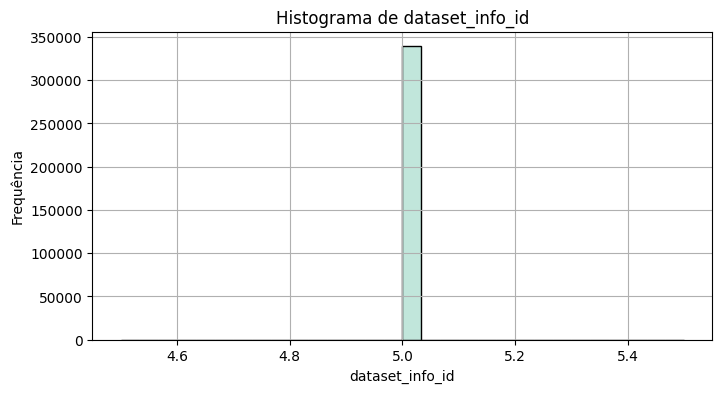


Tabela de Frequência para: score_sentiment


score_sentiment
-1.0000     7
-0.9999    57
-0.9998    18
-0.9997     2
-0.9996     7
           ..
 0.9987     3
 0.9988     1
 0.9989    11
 0.9990     2
 0.9992    11
Name: count, Length: 7807, dtype: int64

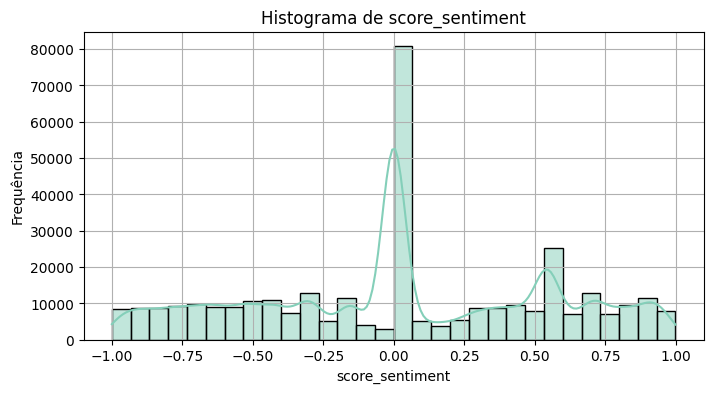


Tabela de Frequência para: score_misinformation


score_misinformation
0.000003    1
0.000025    1
0.000042    1
0.000056    1
0.000067    1
           ..
1.000000    3
1.000000    1
1.000000    6
1.000000    1
1.000000    2
Name: count, Length: 100588, dtype: int64

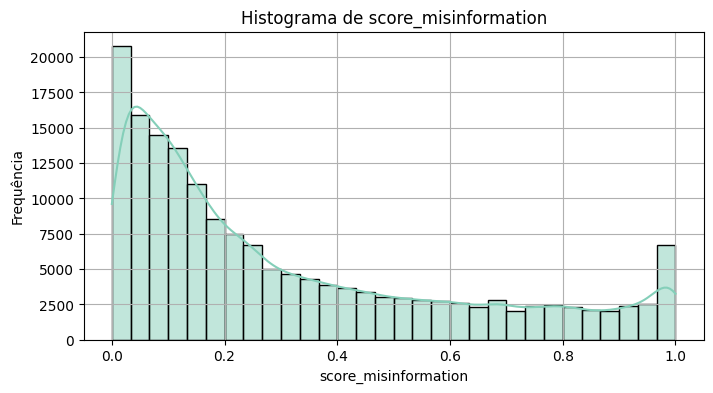


Tabela de Frequência para: id_message


id_message
2          1
3          1
4          1
5          1
6          1
          ..
1516403    1
1516410    1
1516422    1
1516427    1
1516436    1
Name: count, Length: 232563, dtype: int64

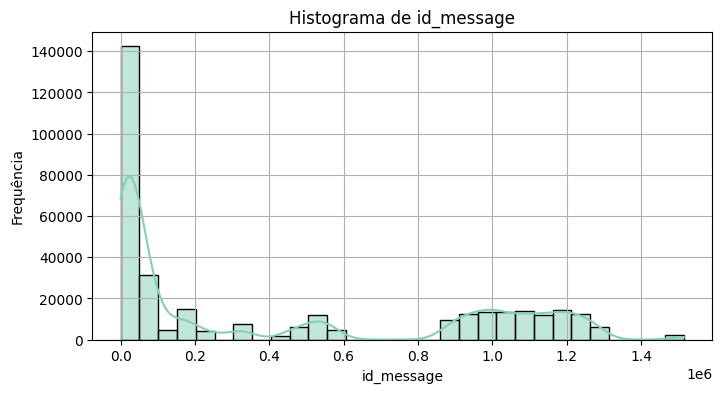


Tabela de Frequência para: qtd_palavras


qtd_palavras
5       5480
6       5286
7       4140
8       3251
9       3810
        ... 
926       24
943        1
993        8
994        7
1261       3
Name: count, Length: 748, dtype: int64

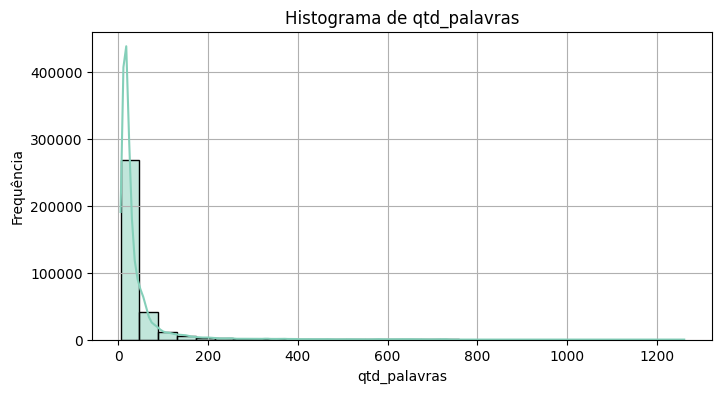

In [29]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    # Tabela de Frequência
    frequencia = serie.value_counts().sort_index()
    print(f"\nTabela de Frequência para: {coluna}")
    display(frequencia)
    
    
    # Seleciona uma cor da paleta BuGn
    bu_gn_color = sns.color_palette("BuGn", as_cmap=False)[2]  # Seleciona um tom intermediário

    # Histograma
    plt.figure(figsize=(8, 4))
    sns.histplot(serie, bins=30, kde=True, color=bu_gn_color)
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

#### 4. **Boxplot**

Como parte da análise exploratória, o boxplot é uma ferramenta estatística fundamental para visualizar:

- A **distribuição dos dados**.
- A presença de **outliers**.
- A **dispersão** e possíveis **assimetrias**.

A escolha da paleta de cores **"BuGn"** visa garantir uma apresentação visual agradável, profissional e consistente ao longo do notebook, reforçando o padrão estético adotado.

Além disso, essa representação facilita a identificação rápida de variáveis que podem apresentar comportamentos anômalos ou dados extremos, elementos importantes para orientar etapas posteriores da análise.

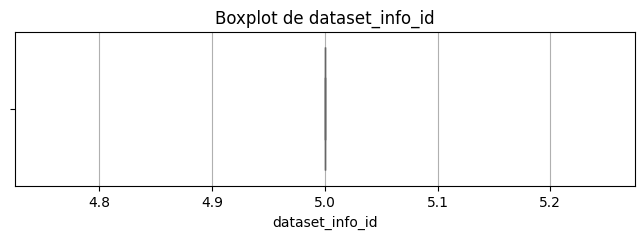

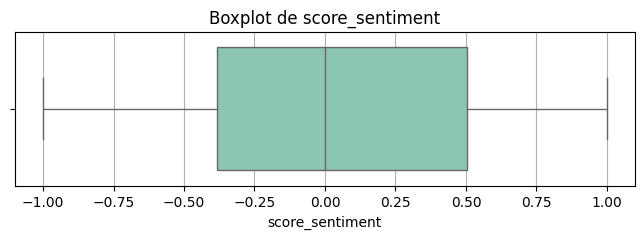

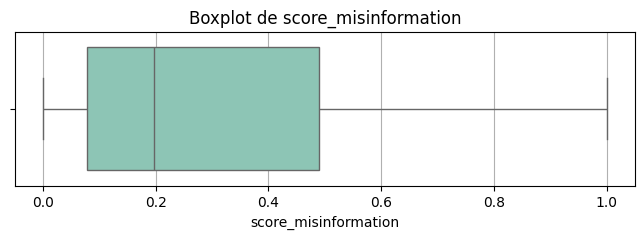

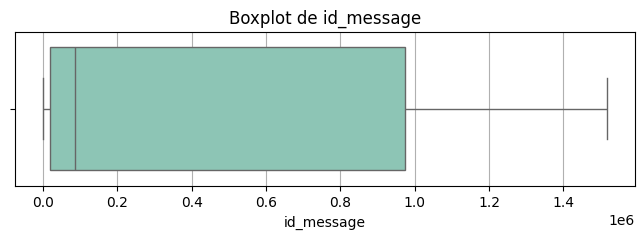

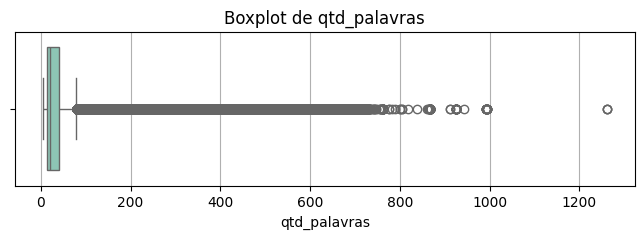

In [27]:
# Seleção das colunas numéricas com base nos tipos
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()

    bu_gn_color = sns.color_palette("BuGn", as_cmap=False)[2]  # Seleciona um tom intermediário

    # Boxplot
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=serie, color=bu_gn_color)
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)
    plt.grid(True, axis='x')
    plt.show()

#### 5. **QQ-Plot**

Análise Gráfica: QQ-Plot por Atributo Numérico

Os **QQ-Plots** (*Quantile-Quantile Plots*) permite avaliar graficamente se a distribuição dos dados de cada variável segue uma **distribuição normal**.

Justificativa do Uso da Biblioteca `scipy.stats`

Nesta etapa da análise, utilizamos a função `probplot` da biblioteca **SciPy** (`scipy.stats`) para a construção dos **QQ-Plots**.

A **SciPy** (Scientific Python) é uma biblioteca robusta para computação científica e estatística, amplamente utilizada em análises de dados por oferecer:

- **Funções estatísticas avançadas**.
- Testes de hipóteses e análises de distribuição.
- Ferramentas de modelagem matemática e processamento de sinais.

No contexto desta análise, o módulo `scipy.stats` foi essencial para:

- **Gerar QQ-Plots** que comparam os quantis da distribuição amostral com os da distribuição normal teórica.
- Avaliar graficamente a **adequação dos dados à normalidade**, uma etapa fundamental para orientar a escolha de métodos estatísticos apropriados.


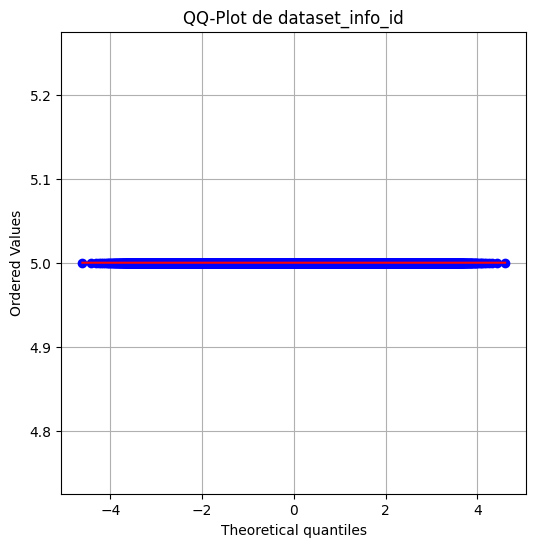

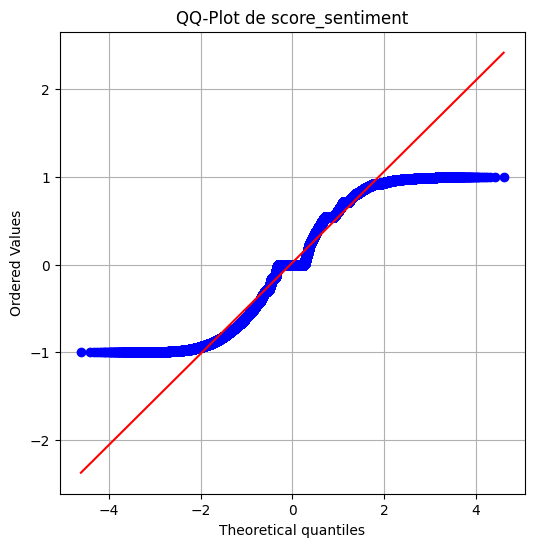

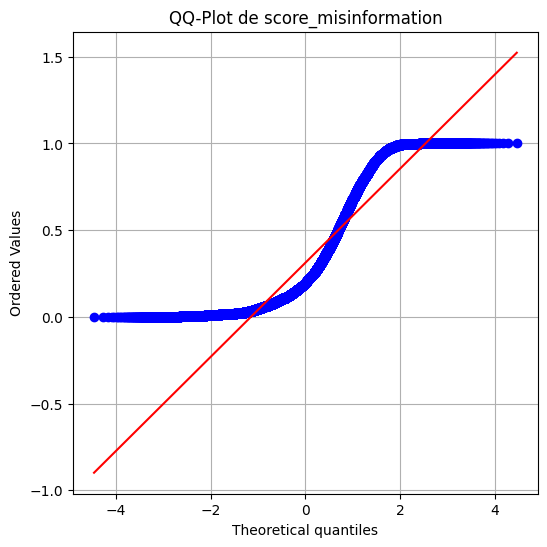

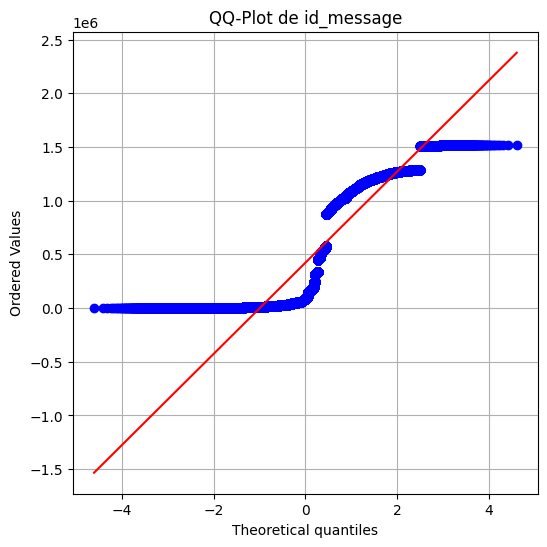

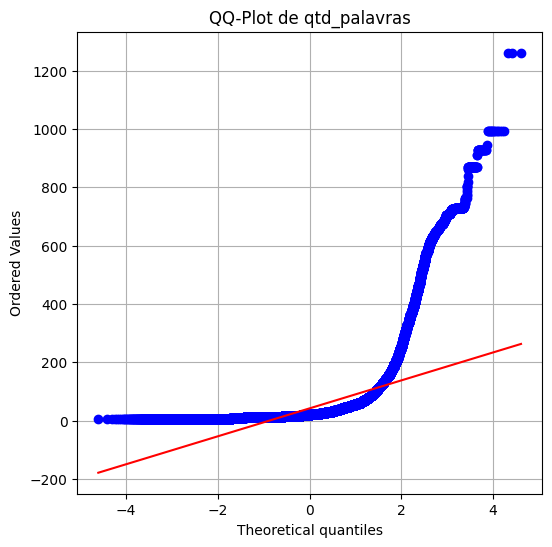

In [ ]:
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    plt.figure(figsize=(6, 6))
    stats.probplot(serie, dist="norm", plot=plt)
    plt.title(f'QQ-Plot de {coluna}')
    plt.grid(True)
    plt.show()

#### 6. **Teste de Normalidade**

Para avaliar a adequação dos dados à **distribuição normal**, realizamos o **Teste de Shapiro-Wilk** em cada uma das colunas numéricas do dataset. Esse teste é amplamente recomendado para amostras pequenas e médias, mas pode ser utilizado como referência mesmo em datasets maiores, com as devidas cautelas quanto à interpretação.

**Justificativa da Escolha:**

- O teste de **Shapiro-Wilk** avalia a hipótese nula de que os dados seguem uma distribuição normal.
- **Valor-p > 0.05**: não rejeitamos a hipótese nula; os dados podem ser considerados normalmente distribuídos.
- **Valor-p ≤ 0.05**: rejeitamos a hipótese nula; os dados provavelmente não seguem uma distribuição normal.

In [ ]:
# Seleção das colunas numéricas
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
resultados_normalidade = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    # o Shapiro-Wilk possui limitação de tamanho (máx ~5000 observações)
    # Portanto, fazemos um sample se for necessário
    if len(serie) > 5000:
        serie = serie.sample(5000, random_state=42)
    
    stat, p = shapiro(serie)
    
    resultado = {
        'Atributo': coluna,
        'Estatística W': round(stat, 4),
        'Valor-p': round(p, 4),
        'Normal?': 'Sim' if p > 0.05 else 'Não'
    }
    
    resultados_normalidade.append(resultado)

# Criação do DataFrame com os resultados
df_normalidade = pd.DataFrame(resultados_normalidade)

# Exibição formatada
display(df_normalidade.sort_values(by='Atributo'))


c:\Users\esthe\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Atributo,Estatística W,Valor-p,Normal?
0,dataset_info_id,1.0000,1.0,Sim
3,id_message,0.7643,0.0,Não
4,qtd_palavras,0.4265,0.0,Não
2,score_misinformation,0.8541,0.0,Não
1,score_sentiment,0.9626,0.0,Não


Complementando o Teste de Shapiro-Wilk, aplicamos o **Teste de Kolmogorov-Smirnov (K-S)** para avaliar a aderência das distribuições numéricas à distribuição normal.

**Por que utilizar o Teste K-S?**

- O **Teste de Kolmogorov-Smirnov** compara a distribuição empírica dos dados com uma distribuição teórica, neste caso, a **distribuição normal padrão**.
- É especialmente útil para **grandes amostras**, pois o Shapiro-Wilk apresenta limitações para conjuntos com mais de 5000 observações.
- Critério de decisão:
  - **Valor-p > 0.05**: não rejeitamos a hipótese nula; a distribuição dos dados não difere significativamente da normal.
  - **Valor-p ≤ 0.05**: rejeitamos a hipótese nula; os dados não seguem uma distribuição normal.

**Nota Técnica:**  
O teste K-S é sensível à média e ao desvio padrão, então, para uma aplicação adequada, os dados foram **padronizados** (z-score) antes do teste.

In [ ]:
# Seleção das colunas numéricas
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Lista para armazenar os resultados
resultados_ks = []

# Loop pelas colunas numéricas
for coluna in atributos_numericos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    # Padronização (z-score)
    serie_padronizada = zscore(serie)
    
    # Aplicação do teste K-S
    stat, p = kstest(serie_padronizada, 'norm')
    
    resultado = {
        'Atributo': coluna,
        'Estatística D': round(stat, 4),
        'Valor-p': round(p, 4),
        'Normal?': 'Sim' if p > 0.05 else 'Não'
    }
    
    resultados_ks.append(resultado)

# Criação do DataFrame com os resultados
df_ks = pd.DataFrame(resultados_ks)

# Exibição formatada
display(df_ks.sort_values(by='Atributo'))

C:\Users\esthe\AppData\Local\Temp\ipykernel_23144\3626569203.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  serie_padronizada = zscore(serie)


,Atributo,Estatística D,Valor-p,Normal?
0,dataset_info_id,NaN,NaN,Não
3,id_message,0.2639,0.0,Não
4,qtd_palavras,0.3085,0.0,Não
2,score_misinformation,0.1557,0.0,Não
1,score_sentiment,0.1214,0.0,Não


#### 7. **Best Fit Distribution (usando diferentes métodos)**

**Motivações para essa abordagem:**
- Permite modelar fenômenos com mais precisão.
- Essencial para simulações, geração de dados sintéticos ou aplicação de modelos probabilísticos.
- Auxilia na escolha de testes estatísticos mais adequados.

**Metodologia aplicada:**
- Seleção de diversas distribuições clássicas: **Normal**, **Exponencial**, **Gamma**, **Beta**.
- Ajuste dos parâmetros utilizando o método de **Maximum Likelihood Estimation (MLE)**, via `scipy.stats`.
- Cálculo de métricas de aderência, como:
  - **Kolmogorov-Smirnov Statistic** (distância máxima entre CDFs).
  - **Akaike Information Criterion (AIC)** (opcional para comparação mais robusta).

**Importante:**  
- Apenas variáveis **contínuas** foram consideradas.  
- Para variáveis que representam **IDs** ou com distribuição **fortemente discreta**, o ajuste não foi consideradoi.


Melhor ajuste para: score_sentiment


,Distribuição,KS Estatística,KS p-valor,Parâmetros
3,beta,0.1181,0.0,"(1.225944158103615, 1.1806490456169234, -1.001..."
2,gamma,0.1190,0.0,"(2345.12815270133, -25.63685628890309, 0.01094..."
0,norm,0.1214,0.0,"(0.022024824975901948, 0.5297235689559867)"
1,expon,0.2476,0.0,"(-1.0, 1.0220248249759019)"


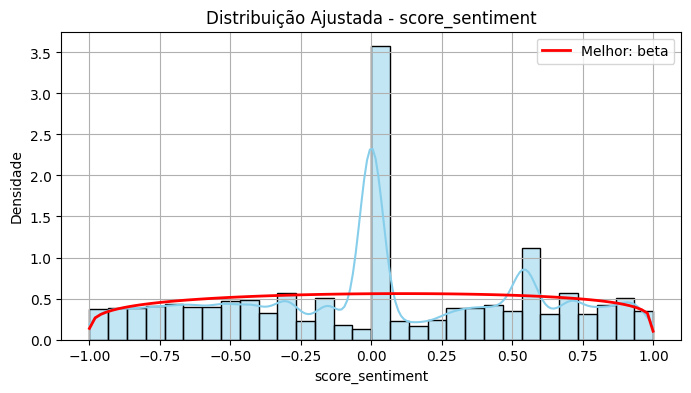

c:\Users\esthe\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Melhor ajuste para: score_misinformation


,Distribuição,KS Estatística,KS p-valor,Parâmetros
2,gamma,0.0467,0.0,"(0.9560778266350399, 3.2731487152999994e-06, 0..."
1,expon,0.0487,0.0,"(3.2731487153e-06, 0.3122595196278037)"
3,beta,0.1039,0.0,"(0.5970920868525846, 1.1260199279122054, 3.273..."
0,norm,0.1557,0.0,"(0.31226279277651897, 0.29370207404974585)"


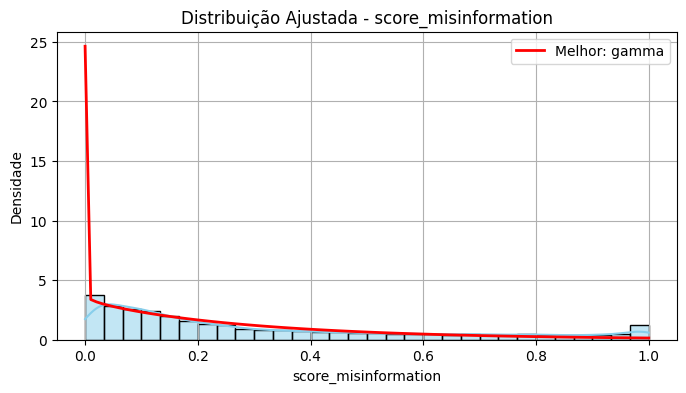

In [20]:
# Seleção das colunas numéricas contínuas
atributos_continuos = ['score_sentiment', 'score_misinformation']

# Lista de distribuições candidatas
distribuicoes = {
    'norm': stats.norm,
    'expon': stats.expon,
    'gamma': stats.gamma,
    'beta': stats.beta
}

# Loop pelas colunas
for coluna in atributos_continuos:
    serie = df_sem_mensagens_curtas[coluna].dropna()
    
    resultados = []
    
    # Ajuste de cada distribuição
    for nome, dist in distribuicoes.items():
        try:
            params = dist.fit(serie)
            ks_stat, ks_p = stats.kstest(serie, nome, args=params)
            resultados.append({
                'Distribuição': nome,
                'KS Estatística': round(ks_stat, 4),
                'KS p-valor': round(ks_p, 4),
                'Parâmetros': params
            })
        except Exception as e:
            print(f"Erro ao ajustar {nome} para {coluna}: {e}")

    # Resultado em DataFrame
    df_resultados = pd.DataFrame(resultados).sort_values(by='KS Estatística')
    print(f"\nMelhor ajuste para: {coluna}")
    display(df_resultados)

    # Plotagem do histograma com densidade
    plt.figure(figsize=(8, 4))
    sns.histplot(serie, bins=30, kde=True, stat='density', color='skyblue')
    
    # Sobreposição da melhor distribuição
    melhor = df_resultados.iloc[0]
    dist_name = melhor['Distribuição']
    params = melhor['Parâmetros']
    
    x = np.linspace(serie.min(), serie.max(), 100)
    pdf = distribuicoes[dist_name].pdf(x, *params)
    plt.plot(x, pdf, 'r-', lw=2, label=f'Melhor: {dist_name}')
    
    plt.title(f'Distribuição Ajustada - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.show()


---

### **(f)** Para cada par de atributos numéricos apresente: 

#### 1. **O Coeficiente de Correlação apropriado**

**Metodologia:**
- Utilizando dois tipos de correlação:
  - **Pearson**: ideal para verificar relações lineares entre variáveis normalmente distribuídas.
  - **Spearman**: robusto a distribuições não-normais e outliers, avalia relações monotônicas.

**Critérios de interpretação:**
- Correlação forte: > 0.7 ou < -0.7.
- Correlação moderada: entre 0.3 e 0.7 (positivo ou negativo).
- Correlação fraca: entre -0.3 e 0.3.

O resultado inclui também o **p-valor** do Spearman, que indica a significância estatística da correlação.

In [31]:
# Seleção das colunas numéricas
atributos_numericos = df_sem_mensagens_curtas.select_dtypes(include=['int64', 'float64']).columns

# Loop para cálculo das correlações
for i in range(len(atributos_numericos)):
    for j in range(i+1, len(atributos_numericos)):
        col1 = atributos_numericos[i]
        col2 = atributos_numericos[j]
        
        dados = df_sem_mensagens_curtas[[col1, col2]].dropna()

        # Verifica se ambos os vetores têm mais de um valor único
        if dados[col1].nunique() <= 1 or dados[col2].nunique() <= 1:
            print(f"\nPar: {col1} vs {col2}")
            print("Correlação não calculada: uma das variáveis é constante.")
            continue

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            # Correlação de Pearson
            pearson_corr = dados[col1].corr(dados[col2], method='pearson')
            
            # Correlação de Spearman
            spearman_corr, spearman_p = spearmanr(dados[col1], dados[col2])

        # Tratamento de NaN na correlação
        if pd.isna(pearson_corr) or pd.isna(spearman_corr):
            print(f"\nPar: {col1} vs {col2}")
            print("Correlação não definida devido a dados constantes ou insuficientes.")
        else:
            print(f"\nPar: {col1} vs {col2}")
            print(f"Pearson: {pearson_corr:.4f}")
            print(f"Spearman: {spearman_corr:.4f} (p-valor: {spearman_p:.4g})")


Par: dataset_info_id vs score_sentiment
Correlação não calculada: uma das variáveis é constante.

Par: dataset_info_id vs score_misinformation
Correlação não calculada: uma das variáveis é constante.

Par: dataset_info_id vs id_message
Correlação não calculada: uma das variáveis é constante.

Par: dataset_info_id vs qtd_palavras
Correlação não calculada: uma das variáveis é constante.

Par: score_sentiment vs score_misinformation
Pearson: -0.3562
Spearman: -0.3885 (p-valor: 0)

Par: score_sentiment vs id_message
Pearson: -0.1084
Spearman: -0.1580 (p-valor: 0)

Par: score_sentiment vs qtd_palavras
Pearson: -0.0955
Spearman: -0.0166 (p-valor: 3.111e-22)

Par: score_misinformation vs id_message
Pearson: 0.1732
Spearman: 0.2452 (p-valor: 0)

Par: score_misinformation vs qtd_palavras
Pearson: 0.2857
Spearman: 0.1815 (p-valor: 0)

Par: id_message vs qtd_palavras
Pearson: -0.0119
Spearman: -0.0526 (p-valor: 9.872e-207)


#### 2. **Um Gráfico de Dispersão**

- Essencial para verificar padrões visuais, como tendências lineares ou não-lineares.
- Facilita a identificação de **outliers** e **clusters**.
- Complementa a análise estatística, tornando-a mais interpretável.

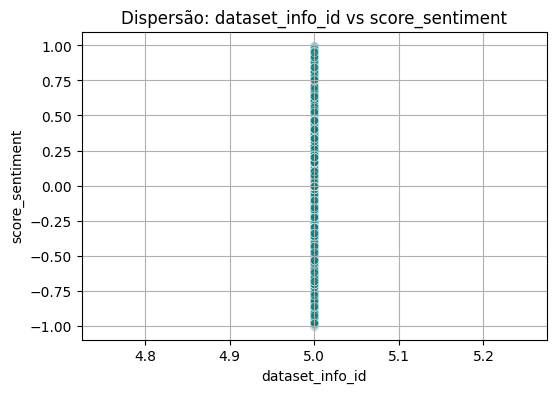

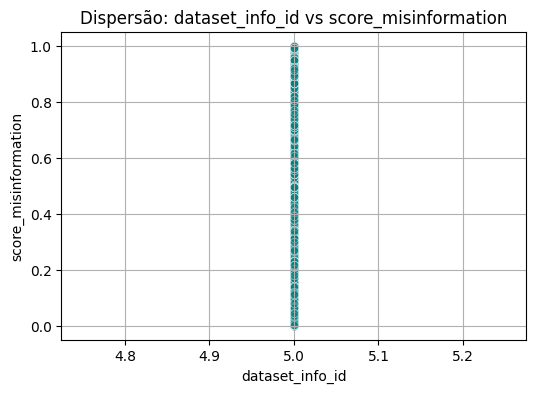

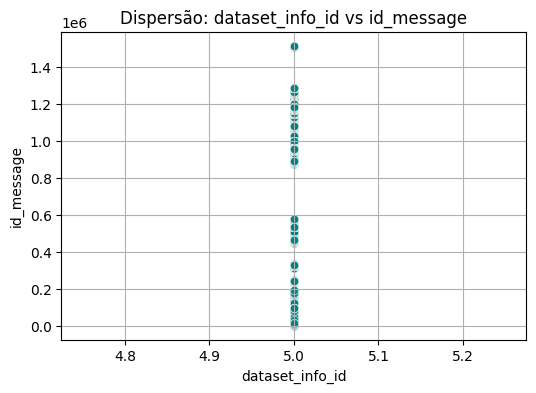

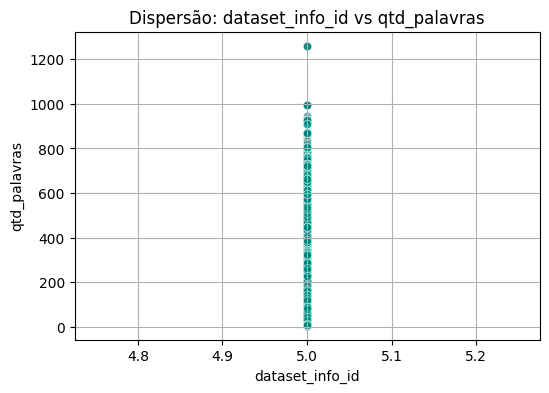

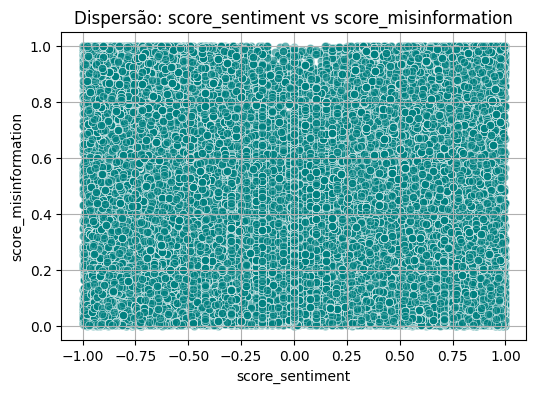

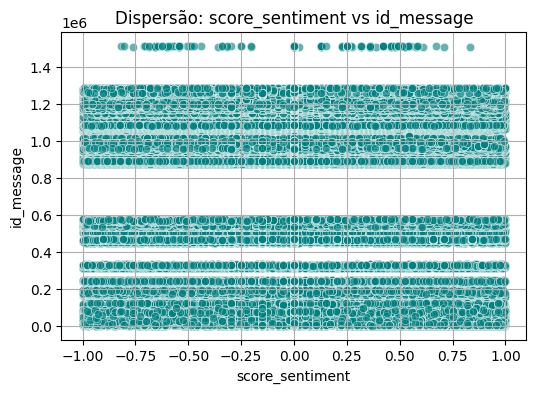

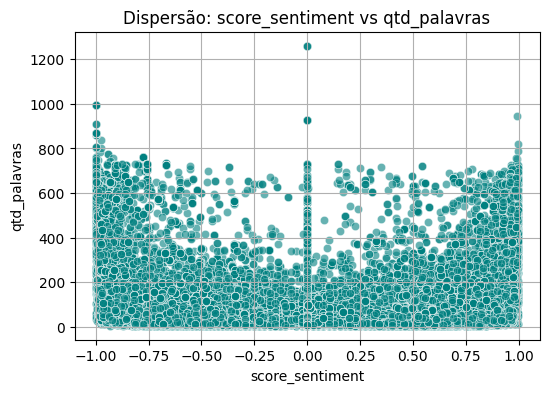

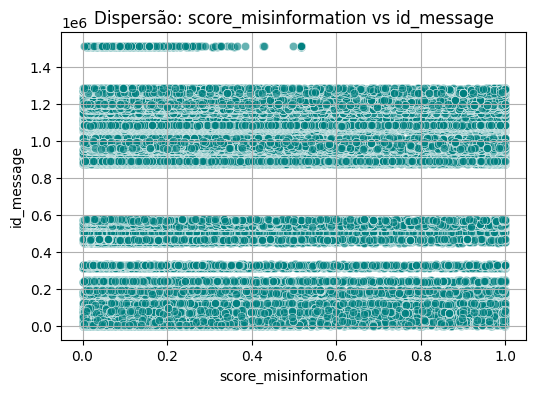

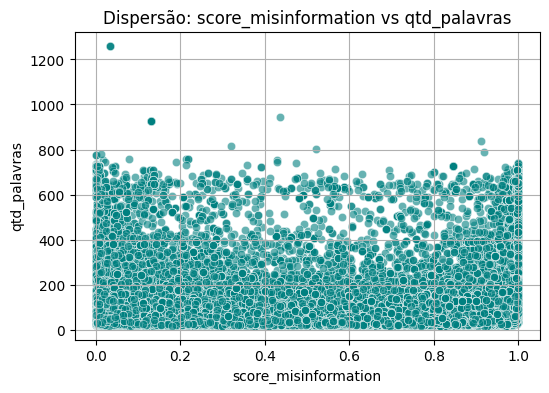

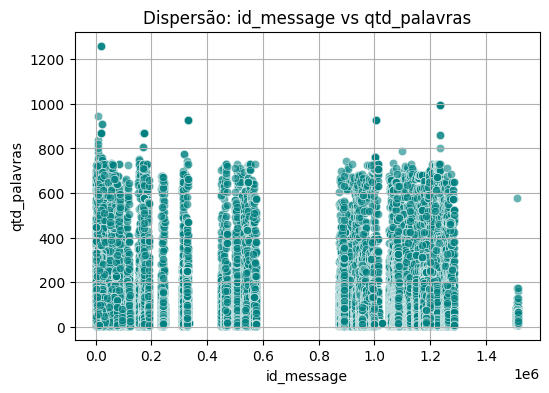

In [29]:
# Loop para plotar os gráficos de dispersão
for i in range(len(atributos_numericos)):
    for j in range(i+1, len(atributos_numericos)):
        col1 = atributos_numericos[i]
        col2 = atributos_numericos[j]
        
        dados = df_sem_mensagens_curtas[[col1, col2]].dropna()

        # Gráfico de Dispersão
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=dados, x=col1, y=col2, alpha=0.6, color='teal')
        plt.title(f'Dispersão: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

---

### **(g)** Para cada par de atributos numéricos apresente: O resultado do método V de Cramer 

Para avaliar a **força de associação** entre duas variáveis categóricas, utilizamos o **V de Cramer**. Esse coeficiente é baseado no teste qui-quadrado e varia de 0 (nenhuma associação) até 1 (associação perfeita).

**Etapas:**
1. Selecionei as colunas categóricas.
2. Criei uma tabela de contingência para cada par.
3. Apliquei o teste qui-quadrado.
4. Calculei o V de Cramer.

**Importante:** O V de Cramer ajusta o qui-quadrado conforme o tamanho da amostra e as dimensões da tabela, evitando inflar o valor em tabelas grandes.

In [ ]:
# Função para calcular o V de Cramer
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt((chi2 / n) / min_dim)

# Seleção das colunas categóricas
atributos_categoricos = [
    col for col in df_sem_mensagens_curtas.select_dtypes(include=['object', 'bool']).columns
    if df_sem_mensagens_curtas[col].nunique() <= 50
] # Necessário para não explodir a memória

# Loop sobre cada par de atributos categóricos
for i in range(len(atributos_categoricos)):
    for j in range(i + 1, len(atributos_categoricos)):
        col1 = atributos_categoricos[i]
        col2 = atributos_categoricos[j]
        
        # Tabela de contingência
        tabela_contingencia = pd.crosstab(df_sem_mensagens_curtas[col1], df_sem_mensagens_curtas[col2])
        
        # Verifica se a tabela não é trivial
        if tabela_contingencia.shape[0] < 2 or tabela_contingencia.shape[1] < 2:
            print(f"\nPar: {col1} vs {col2}")
            print("V de Cramer não calculado: tabela de contingência trivial.")
            continue
        
        # Cálculo do V de Cramer
        v = cramers_v(tabela_contingencia)
        
        print(f"\nPar: {col1} vs {col2}")
        print(f"V de Cramer: {v:.4f}")



Par: media_type vs has_media
V de Cramer não calculado: tabela de contingência trivial.

Par: media_type vs has_media_url
V de Cramer: 0.6797

Par: media_type vs trava_zap
V de Cramer não calculado: tabela de contingência trivial.

Par: media_type vs message_type
V de Cramer: 0.9196

Par: media_type vs messenger
V de Cramer não calculado: tabela de contingência trivial.

Par: has_media vs has_media_url
V de Cramer: 0.4845

Par: has_media vs trava_zap
V de Cramer não calculado: tabela de contingência trivial.

Par: has_media vs message_type
V de Cramer: 1.0000

Par: has_media vs messenger
V de Cramer não calculado: tabela de contingência trivial.

Par: has_media_url vs trava_zap
V de Cramer não calculado: tabela de contingência trivial.

Par: has_media_url vs message_type
V de Cramer: 0.6834

Par: has_media_url vs messenger
V de Cramer não calculado: tabela de contingência trivial.

Par: trava_zap vs message_type
V de Cramer não calculado: tabela de contingência trivial.

Par: trava_za

---

# Fontes

- [Matplotlib 3.10.3 documentation](https://matplotlib.org/stable/index.html)
- [Seaborn Documentation](seaborn.histplot)
- [Statistical Data Visualization with Seaborn](https://seaborn.pydata.org/tutorial.html)